The project involves predicting a patient's condition based on drug reviews

In [5]:
# %pip install streamlit

In [29]:
# importing the necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import html
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
# loading the dataset
review_data = pd.read_csv('drugsComTrain_raw.csv')

# dropping unwanted columns
review_data = review_data.drop(['uniqueID', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

review_data_df = review_data[(review_data['condition'] == 'Birth Control') | (review_data['condition'] == 'Depression') | (review_data['condition'] == 'High Blood Pressure') | (review_data['condition'] == 'Diabetes, Type 2') | (review_data['condition'] == 'Cough') | (review_data['condition'] == 'Hepatitis C') | (review_data['condition'] == 'Obesity')].reset_index(drop=True)

review_data_df.head()

condition                                             review
0  Birth Control  "I used to take another oral contraceptive, wh...
1  Birth Control  "This is my first time using any form of birth...
2  Birth Control  "I had been on the pill for many years. When m...
3     Depression  "I have taken anti-depressants for years, with...
4          Cough  "Have a little bit of a lingering cough from a...

In [49]:
review_data_df['condition'].unique()

array(['Birth Control', 'Depression', 'Cough', 'Obesity', 'Hepatitis C',
       'Diabetes, Type 2', 'High Blood Pressure'], dtype=object)

In [50]:
# let's divide the dataframe
birth_data = review_data_df.loc[review_data_df['condition'] == 'Birth Control']
depression_data = review_data_df.loc[review_data_df['condition'] == 'Depression']
high_blood_data = review_data_df.loc[review_data_df['condition'] == 'High Blood Pressure']
diabetes_data = review_data_df.loc[review_data_df['condition'] == 'Diabetes, Type 2']
cough_data = review_data_df.loc[review_data_df['condition'] == 'Cough']
obesity_data = review_data_df.loc[review_data_df['condition'] == 'Obesity']
hep_data = review_data_df.loc[review_data_df['condition'] == 'Hepatitis C']

high_blood_data

condition                                             review
31     High Blood Pressure  "My blood pressure has been around 160/100. Do...
61     High Blood Pressure  "I&#039;m a 27 year old white male in good sha...
68     High Blood Pressure  "I have been on metoprolol er 12.5mg since Sep...
122    High Blood Pressure  "Using this for parasomnia, bph and bp. Kind o...
149    High Blood Pressure  "I took Lopressor for 24 years it worked very ...
...                    ...                                                ...
47834  High Blood Pressure  "I&#039;m a 54 years old non-smoker, 5&#039;8&...
47862  High Blood Pressure  "I took this along with a beta blocker,and alt...
47869  High Blood Pressure  "It is fourth blood pressure pill for me. It f...
47872  High Blood Pressure  "While on Bystolic my feet and arms were numb....
47881  High Blood Pressure  "I have only been on Tekturna for 9 days. The ...

[2321 rows x 2 columns]

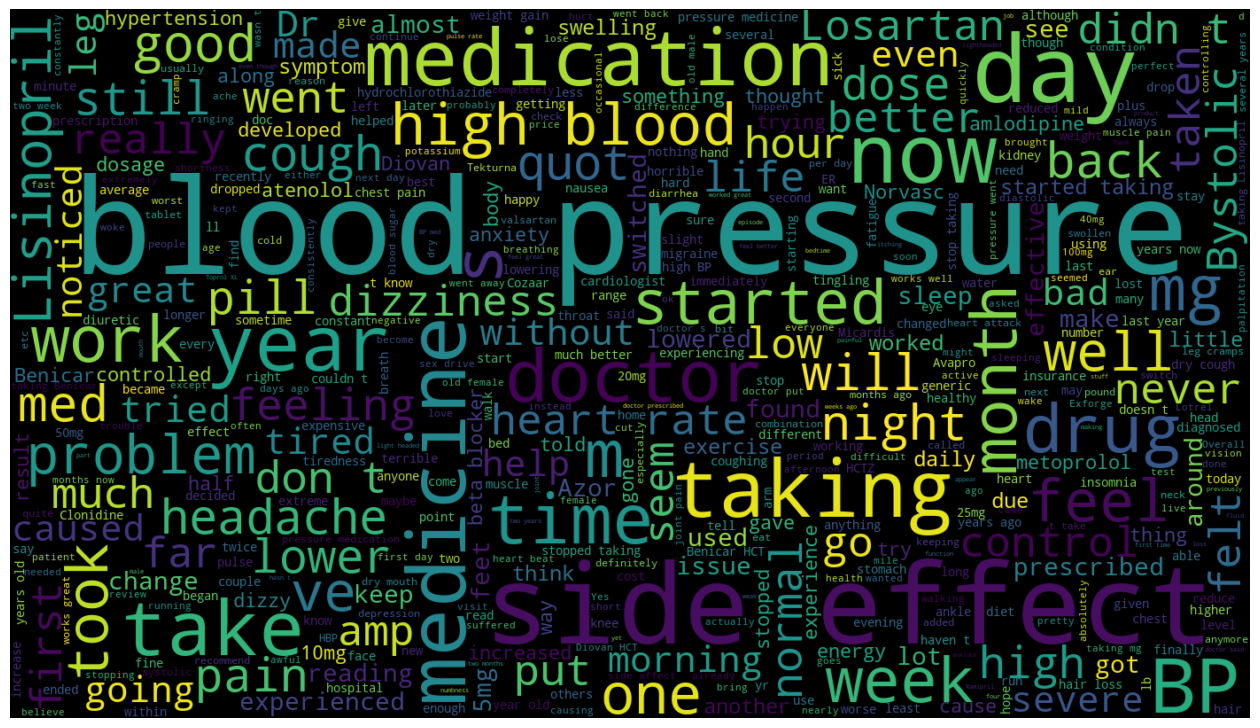

In [51]:
# plotting the wordcloud

plt.figure(figsize=(16, 16))
wordcloud = WordCloud(width=1400, height=800, max_words=500).generate(" ".join(str(review) for review in high_blood_data['review'] if pd.notnull(review)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

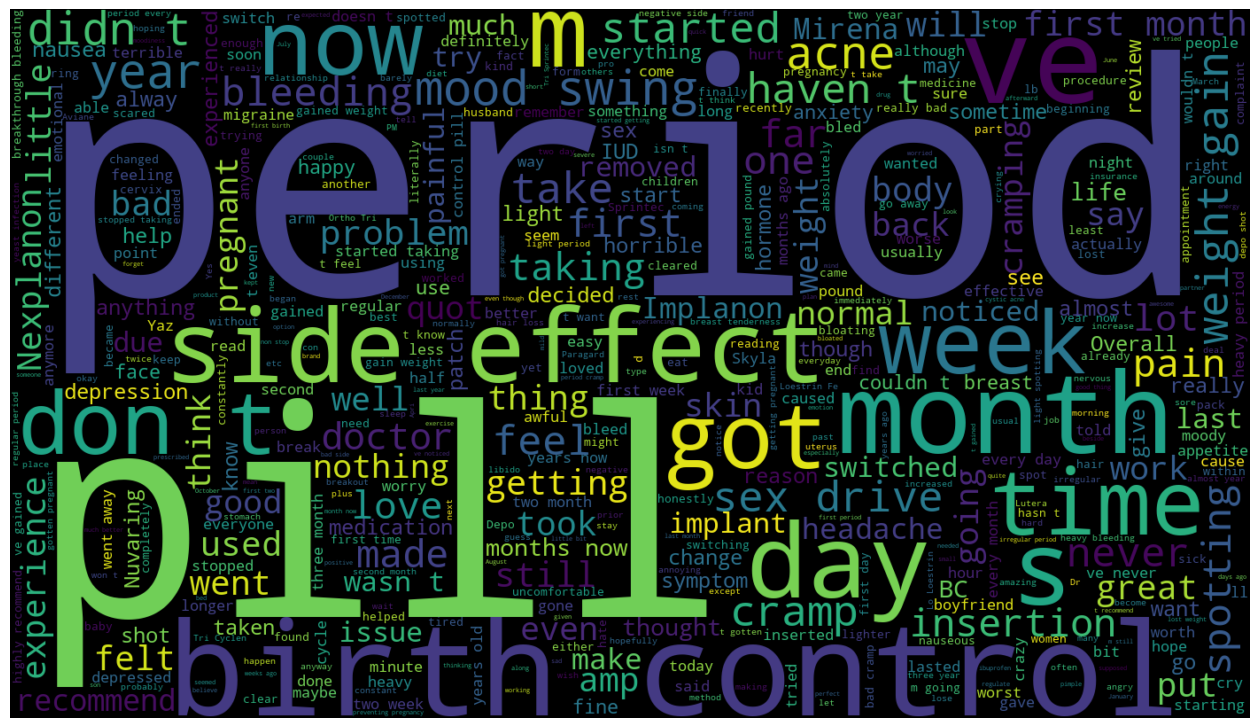

In [34]:
plt.figure(figsize=(16, 16))

wordcloud = WordCloud(width=1400, height=800, max_words=500).generate(" ".join(str(review) for review in birth_data['review'] if pd.notnull(review)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

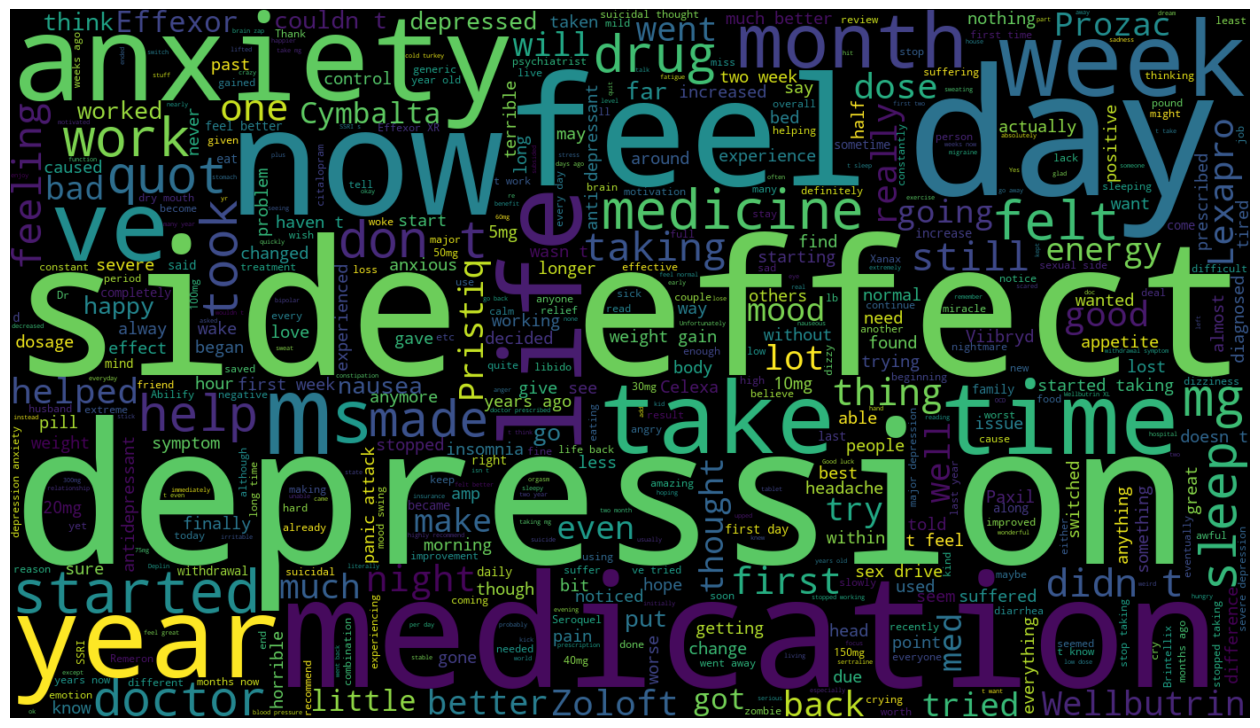

In [35]:
plt.figure(figsize=(16, 16))

wordcloud = WordCloud(width=1400, height=800, max_words=500).generate(" ".join(str(review) for review in depression_data['review'] if pd.notnull(review)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

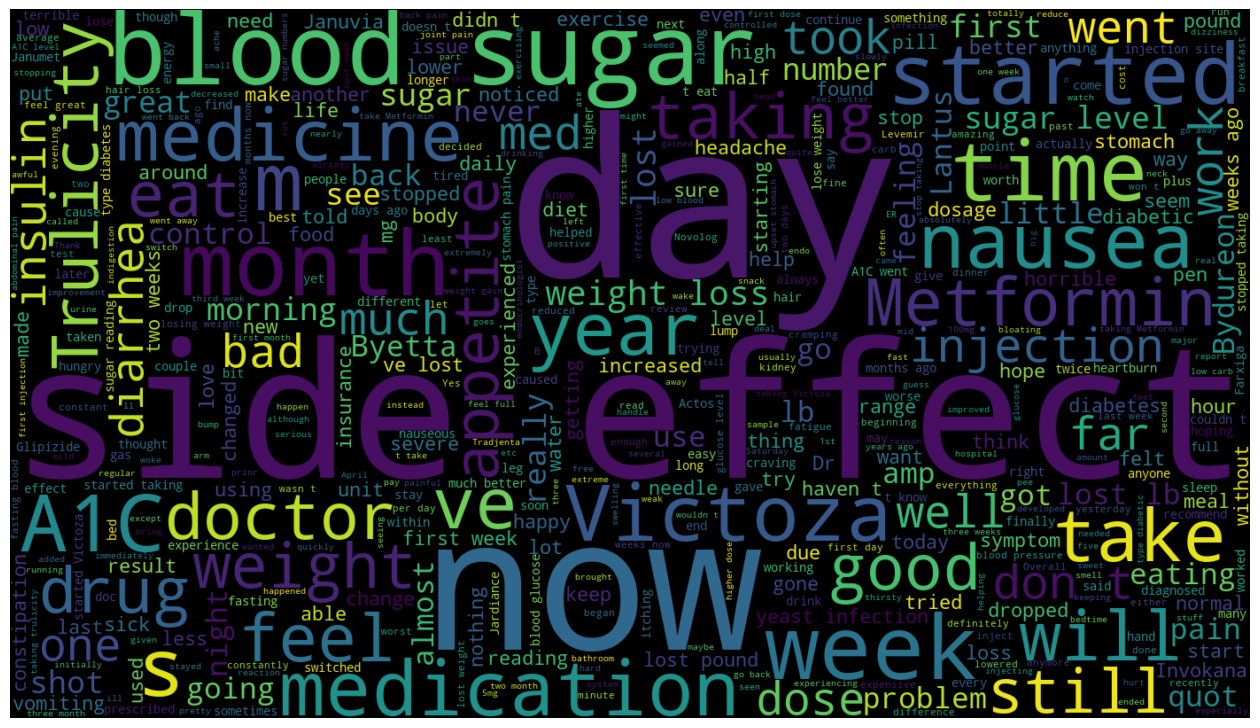

In [36]:
plt.figure(figsize=(16, 16))

wordcloud = WordCloud(width=1400, height=800, max_words=500).generate(" ".join(str(review) for review in diabetes_data['review'] if pd.notnull(review)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [52]:
# let's preprocess the data
review_data_df["review"] = review_data_df["review"].astype(str).apply(html.unescape)
review_data_df["review"] = review_data_df["review"].str.replace('"', ' ', regex=False)

review_data_df.head(5)

condition                                             review
0  Birth Control   I used to take another oral contraceptive, wh...
1  Birth Control   This is my first time using any form of birth...
2  Birth Control   I had been on the pill for many years. When m...
3     Depression   I have taken anti-depressants for years, with...
4          Cough   Have a little bit of a lingering cough from a...

In [ ]:
import nltk
nltk.download('wordnet')

In [53]:
# let's remove the stop words
stop_words = stopwords.words('english')

# defining a function to remove stop words, lemmatize and clean the data
def clean_data(review_data):
    review_content = BeautifulSoup(review_data, 'html.parser').get_text()

    letters = re.sub('[^a-zA-Z]', ' ', review_content)

    # splitting and lowering the words
    words = letters.lower().split()

    meaningful_words = [w for w in words if not w in stop_words]

    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

    # returning the joined words
    return (' '.join(lemmatized_words))

review_data_df['review_clean'] = review_data_df['review'].apply(clean_data)

review_data_df.head()

C:\Users\STUDSENT\AppData\Local\Temp\ipykernel_16336\2782178977.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_content = BeautifulSoup(review_data, 'html.parser').get_text()


condition                                             review  \
0  Birth Control   I used to take another oral contraceptive, wh...   
1  Birth Control   This is my first time using any form of birth...   
2  Birth Control   I had been on the pill for many years. When m...   
3     Depression   I have taken anti-depressants for years, with...   
4          Cough   Have a little bit of a lingering cough from a...   

                                        review_clean  
0  used take another oral contraceptive pill cycl...  
1  first time using form birth control glad went ...  
2  pill many year doctor changed rx chateal effec...  
3  taken anti depressant year improvement mostly ...  
4  little bit lingering cough cold giving much tr...

In [55]:
# extracting the explanatory and target variables
explanatory_var = review_data_df['review_clean']
target_var = review_data_df['condition']


# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(explanatory_var, target_var, test_size=0.2, random_state=42, stratify=target_var)

# creating the count vectorizer of the content
count_vectorizer = CountVectorizer(stop_words='english')
train_vectors = count_vectorizer.fit_transform(X_train)
test_vectors = count_vectorizer.transform(X_test)

In [56]:
# building the model ---------------------- Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(train_vectors, y_train)
predictions = naive_bayes.predict(test_vectors)

# computing the accuracy score
score = accuracy_score(y_test, predictions)
print(f'The accuracy score: {score}\n')

# confusing matrix
conf_matrix = confusion_matrix(y_test, predictions, labels=['Depression', 'Birth Control', 'Diabetes, Type 2',
       'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C'])
labels = ['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C']

# conf_matrix

The accuracy score: 0.9562493473948



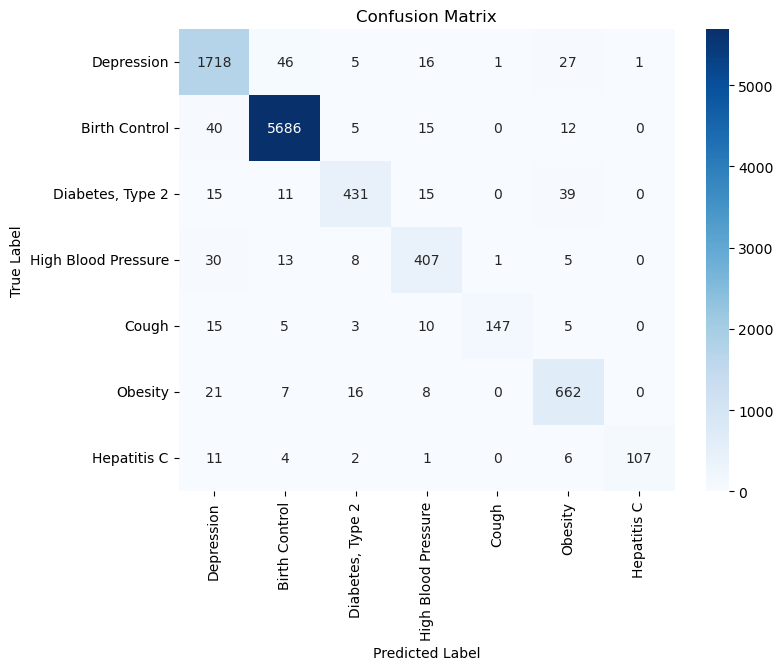

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True,          
            fmt='d',             
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The accuracy score: 0.9668998642581184



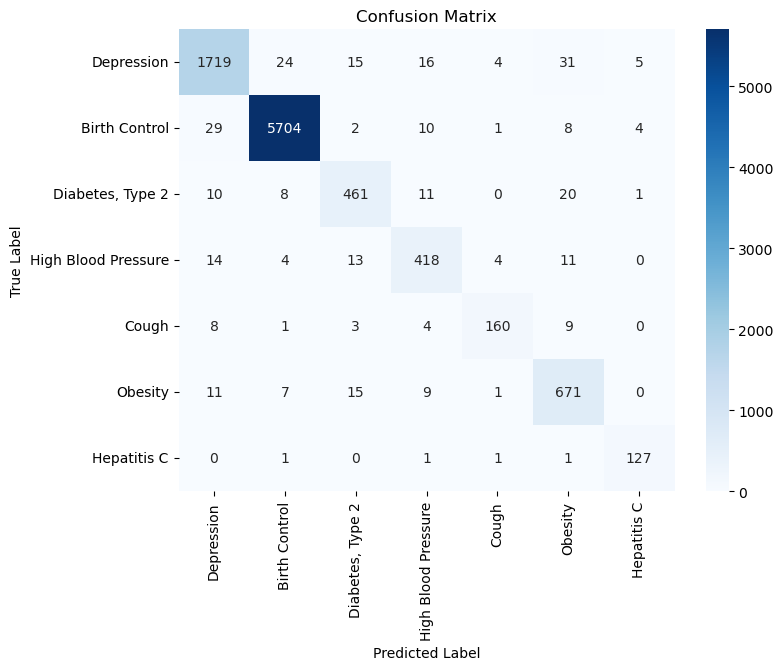

In [58]:
# building the model ----------------------------- Passive Aggressive Classifier
passive_model = PassiveAggressiveClassifier()

# fitting the model
passive_model.fit(train_vectors, y_train)

# predicting the features
preds = passive_model.predict(test_vectors)

# computing the accuracy
score = accuracy_score(y_test, preds)
print(f'The accuracy score: {score}\n')

# plotting the confusion matrix
conf_matrix_pac = confusion_matrix(y_test, preds, labels=['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C'])
labels = ['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C']

# conf_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pac, 
            annot=True,          
            fmt='d',             
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

The accuracy score: 0.971389788033831



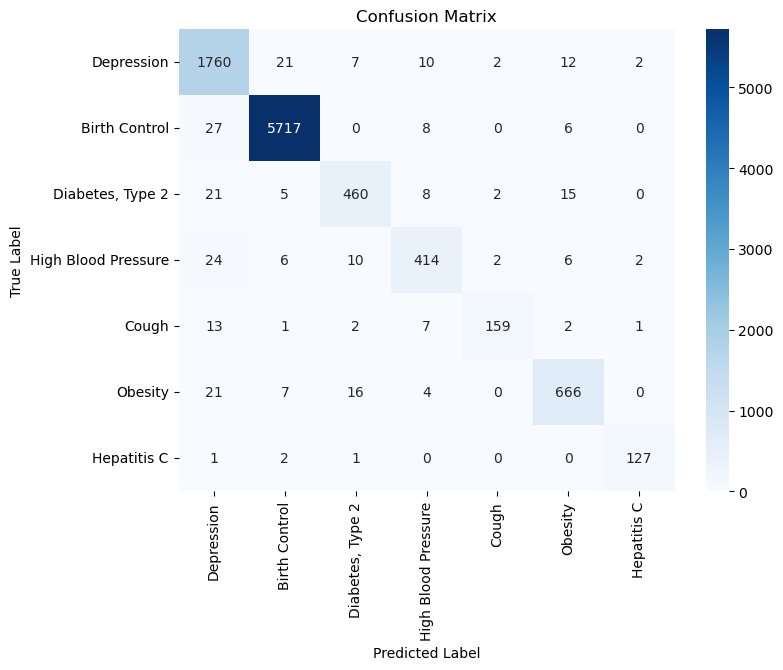

In [59]:
# building the model -------------------- Logistic Regression
logistic_model = LogisticRegression()

# fitting the model
logistic_model.fit(train_vectors, y_train)

# predicting the data
preds_log = logistic_model.predict(test_vectors)

# computing the accuracy score
score = accuracy_score(y_test, preds_log)
print(f'The accuracy score: {score}\n')


# plotting the confusion matrix
conf_matrix_log = confusion_matrix(y_test, preds_log, labels=['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C'])
labels = ['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C']

# conf_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, 
            annot=True,          
            fmt='d',             
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [60]:
# using the tfidf for the model
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

The accuracy score: 0.8744909679440326


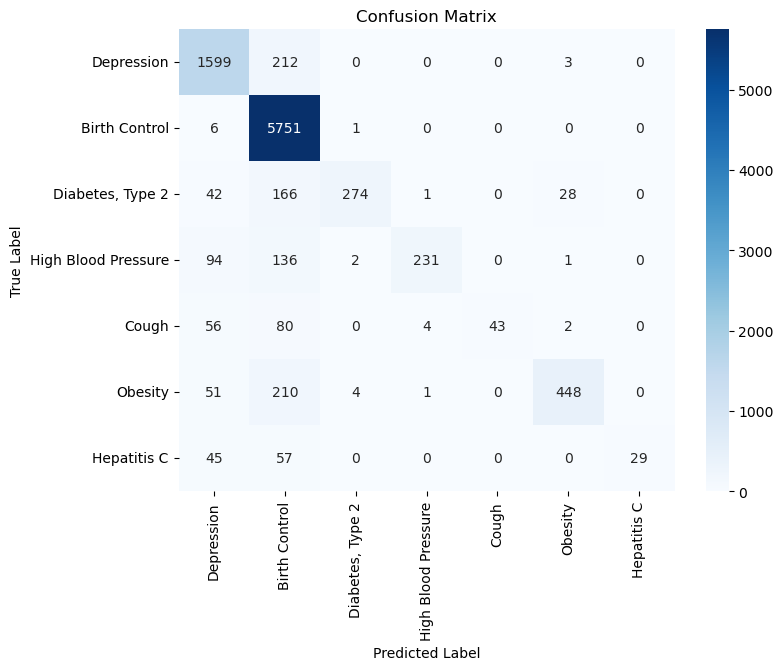

In [62]:
# building the model using the TfidfVectors ----------------- Naive Bayes
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(tfidf_train, y_train)

# predicting using Tfidf naive bayes model
preds_tfid = naive_bayes_tfidf.predict(tfidf_test)

# getting the accuracy score
score = accuracy_score(y_test, preds_tfid)
print(f'The accuracy score: {score}')


# plotting the confusion matrix
conf_matrix_tfidf = confusion_matrix(y_test, preds_tfid, labels=['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C'])
labels = ['Depression', 'Birth Control', 'Diabetes, Type 2', 'High Blood Pressure', 'Cough', 'Obesity', 'Hepatitis C']

# conf_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, 
            annot=True,          
            fmt='d',             
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [63]:
import streamlit as st
import joblib

# Save the model
joblib.dump(logistic_model, "logistic_model.pkl")

# Save the vectorizer
joblib.dump(count_vectorizer, "count_vectorizer.pkl")



['count_vectorizer.pkl']